In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l


## 生成数据集

给定样本特征$x$，我们使用如下的三阶多项式函数来生成该样本的标签：$y=1.2x-3.4x^2+5.6x^3+5+\epsilon$  
其中噪声项$\epsilon$ 服从均值为0、标准差为0.01的正态分布。训练数据集和测试数据集的样本数都设为100。

In [4]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
print(features)
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) 
print(poly_features)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)


tensor([[ 4.9147e-01],
        [ 1.4264e+00],
        [ 1.6574e-01],
        [ 1.2780e+00],
        [ 6.1581e-02],
        [-1.0231e+00],
        [-1.2052e-01],
        [-1.3395e-01],
        [ 1.3681e+00],
        [-3.4755e-01],
        [ 8.7078e-01],
        [-8.8766e-01],
        [ 2.3838e-01],
        [ 1.2594e-01],
        [-4.7177e-01],
        [ 2.0631e-03],
        [ 5.0160e-01],
        [ 1.0410e+00],
        [-2.1461e-01],
        [-4.7614e-01],
        [ 1.1389e+00],
        [ 1.0253e-01],
        [ 1.0761e+00],
        [ 1.5111e+00],
        [-1.7086e+00],
        [-7.0016e-02],
        [-3.7682e-01],
        [-1.7261e+00],
        [-2.0038e-02],
        [-9.0416e-01],
        [ 1.0921e+00],
        [-3.2150e-01],
        [-3.6748e-01],
        [-2.3904e-01],
        [ 1.6053e+00],
        [ 1.1884e+00],
        [ 6.3362e-01],
        [-3.4343e-01],
        [ 6.9694e-01],
        [-2.2270e-01],
        [ 1.0737e+00],
        [ 2.6601e-01],
        [ 1.5044e-01],
        [-6

        [ 1.1047e+00,  1.2203e+00,  1.3480e+00]])


In [5]:
features[:2], poly_features[:2], labels[:2]


(tensor([[0.4915],
         [1.4264]]), tensor([[0.4915, 0.2415, 0.1187],
         [1.4264, 2.0348, 2.9025]]), tensor([ 5.4290, 16.0438]))

## 定义、训练和测试模型

我们先定义作图函数semilogy，其中 y 轴使用了对数尺度。

In [6]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)


In [7]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear文档可知，pytorch已经将参数初始化了，所以我们这里就不手动初始化了

    batch_size = min(10, train_labels.shape[0])    
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)


final epoch: train loss 0.0003307308943476528 test loss 0.0010799800511449575
weight: tensor([[ 1.2388, -3.4043,  5.5826]]) 
bias: tensor([5.0013])


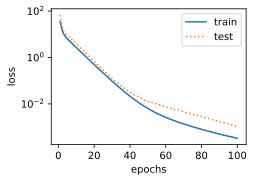

In [8]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], 
            labels[:n_train], labels[n_train:])

final epoch: train loss 39.79713821411133 test loss 106.65370178222656
weight: tensor([[11.4836]]) 
bias: tensor([2.4076])


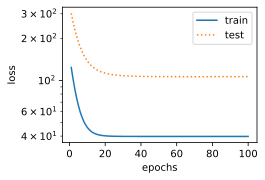

In [9]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])


final epoch: train loss 0.39917266368865967 test loss 90.31316375732422
weight: tensor([[2.2036, 1.3943, 2.5457]]) 
bias: tensor([2.8265])


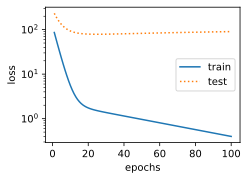

In [10]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])